In [1]:
import turicreate as tc
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sales = tc.SFrame('home_data/')

# Tehdää datan ominaisuuksista matrix ja array jossa on hinnat

In [3]:
def get_numpy_data(data_frame, features, output):
    data_frame['constant'] = 1
    features = ['constant'] + features
    features_sframe = data_frame[features]
    features_matrix = features_sframe.to_numpy()
    output_sarray = data_frame[output]
    output_array = output_sarray.to_numpy()
    print(features_matrix)
    return features_matrix, output_array

In [4]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return predictions

In [5]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant is True:
        derivative = 2 * np.dot(feature, errors)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(feature, errors) + 2*l2_penalty*weight
    return derivative

In [6]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors*example_features[:,1])*2+20.)
print('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2.)

[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]
-56554166782350.0
-56554166782350.0

-22446749336.0
-22446749336.0


# Gradient descent algorytmin tekeminen jossa otetaan L2 penalty huomioon

In [7]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations:
    while iteration <= max_iterations:
      # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            # subtract the step size times the derivative from the current weight
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], 0.0, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)
            weights[i] -= step_size * derivative
        iteration += 1
    print('Done with gradient descent at iteration ', iteration)
    print('Learned weights = ', str(weights))
    return weights

In [8]:
simple_features = ['sqft_living']
my_output = 'price'

In [9]:
train_data,test_data = sales.random_split(.8,seed=0)

In [10]:
simple_feature_matrix, output = get_numpy_data(train_data, simple_features, my_output)
simple_test_feature_matrix, test_output = get_numpy_data(test_data, simple_features, my_output)

[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.53e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]
[[1.00e+00 1.43e+03]
 [1.00e+00 2.95e+03]
 [1.00e+00 1.71e+03]
 ...
 [1.00e+00 2.52e+03]
 [1.00e+00 2.31e+03]
 [1.00e+00 1.02e+03]]


In [11]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [12]:
zero_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0.0, max_iterations = 100)
zero_penalty

Starting gradient descent with l2_penalty = 0.0
Iteration = 0
Cost function =  7433051851026171.0
Iteration = 1
Cost function =  5394267213135525.0
Iteration = 2
Cost function =  4023237736501158.0
Iteration = 3
Cost function =  3101256183922414.0
Iteration = 4
Cost function =  2481247644505113.0
Iteration = 5
Cost function =  2064308077891941.2
Iteration = 6
Cost function =  1783927097372279.5
Iteration = 7
Cost function =  1595378203154871.5
Iteration = 8
Cost function =  1468583991054997.5
Iteration = 9
Cost function =  1383318191484981.5
Iteration = 10
Cost function =  1325979165855245.5
Iteration = 20
Cost function =  1210477702484409.5
Iteration = 30
Cost function =  1208293252916462.2
Iteration = 40
Cost function =  1208251938286222.5
Iteration = 50
Cost function =  1208251156204513.0
Iteration = 60
Cost function =  1208251140704254.5
Iteration = 70
Cost function =  1208251139702150.2
Iteration = 80
Cost function =  1208251138974245.0
Iteration = 90
Cost function =  120825113825

array([7.85511563e-02, 2.63024271e+02])

In [13]:
high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations = 100)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 0
Cost function =  7433051851026171.0
Iteration = 1
Cost function =  5618303898412630.0
Iteration = 2
Cost function =  4920613278115385.0
Iteration = 3
Cost function =  4652381942612294.0
Iteration = 4
Cost function =  4549258764014157.0
Iteration = 5
Cost function =  4509612390882265.0
Iteration = 6
Cost function =  4494370050281118.0
Iteration = 7
Cost function =  4488509984030221.0
Iteration = 8
Cost function =  4486256988531771.0
Iteration = 9
Cost function =  4485390752674687.0
Iteration = 10
Cost function =  4485057664747023.0
Iteration = 20
Cost function =  4484848749603832.0
Iteration = 30
Cost function =  4484847785537884.0
Iteration = 40
Cost function =  4484846836142211.0
Iteration = 50
Cost function =  4484845886747973.0
Iteration = 60
Cost function =  4484844937354134.0
Iteration = 70
Cost function =  4484843987960693.0
Iteration = 80
Cost function =  4484843038567651.5
Iteration = 90
Cost function =  4

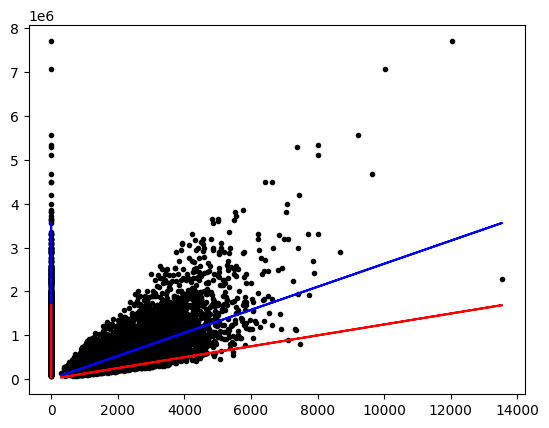

In [14]:
plt.plot(simple_feature_matrix, output, 'k.',
        simple_feature_matrix, predict_output(simple_feature_matrix, zero_penalty), 'b-',
        simple_feature_matrix, predict_output(simple_feature_matrix, high_penalty), 'r-')

In [15]:
def RSS(true, predicted):
    return sum((true - predicted) ** 2)

In [16]:
zeros = RSS(test_output, predict_output(simple_test_feature_matrix, initial_weights))
zeros

1784273282524564.0

In [17]:
no_penalty = '{:.4e}'.format(RSS(test_output, predict_output(simple_test_feature_matrix, zero_penalty)))
no_penalty

'2.7572e+14'

In [18]:
penalty = RSS(test_output, predict_output(simple_test_feature_matrix, high_penalty))
penalty

694653077641344.5

# QUIZ QUESTIONS
1. What is the value of the coefficient for `sqft_living` that you learned with no regularization, rounded to 1 decimal place?  What about the one with high regularization?
2. Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?
3. What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularizatio)? 

1. Ilman L2, 2.6. L2 kanssa 124.6
2. Ilman L2 on jyrkempi
3. Katso ylhäältä

In [19]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
feature_matrix, output = get_numpy_data(train_data, model_features, my_output)
test_feature_matrix, test_output = get_numpy_data(test_data, model_features, my_output)

[[1.00e+00 1.18e+03 1.34e+03]
 [1.00e+00 2.57e+03 1.69e+03]
 [1.00e+00 7.70e+02 2.72e+03]
 ...
 [1.00e+00 1.53e+03 1.53e+03]
 [1.00e+00 1.60e+03 1.41e+03]
 [1.00e+00 1.02e+03 1.02e+03]]
[[1.00e+00 1.43e+03 1.78e+03]
 [1.00e+00 2.95e+03 2.14e+03]
 [1.00e+00 1.71e+03 1.03e+03]
 ...
 [1.00e+00 2.52e+03 2.52e+03]
 [1.00e+00 2.31e+03 1.83e+03]
 [1.00e+00 1.02e+03 1.02e+03]]


In [20]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [21]:
zero_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 0
Cost function =  7433051851026171.0
Iteration = 1
Cost function =  4056752331500973.0
Iteration = 2
Cost function =  2529565114333592.5
Iteration = 3
Cost function =  1838556694275926.8
Iteration = 4
Cost function =  1525675575208603.5
Iteration = 5
Cost function =  1383789498674794.2
Iteration = 6
Cost function =  1319232606276634.8
Iteration = 7
Cost function =  1289648872028921.0
Iteration = 8
Cost function =  1275884724079267.0
Iteration = 9
Cost function =  1269278807577156.5
Iteration = 10
Cost function =  1265914378958661.2
Iteration = 20
Cost function =  1257193975474293.0
Iteration = 30
Cost function =  1251406379775540.2
Iteration = 40
Cost function =  1246268727321417.2
Iteration = 50
Cost function =  1241707409770816.5
Iteration = 60
Cost function =  1237657774414635.5
Iteration = 70
Cost function =  1234062421445731.5
Iteration = 80
Cost function =  1230870390088722.8
Iteration = 90
Cost function =  122803643627

In [22]:
penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 0
Cost function =  7433051851026171.0
Iteration = 1
Cost function =  4460489790285892.0
Iteration = 2
Cost function =  3796674468844608.0
Iteration = 3
Cost function =  3648319530437360.5
Iteration = 4
Cost function =  3615091103216102.5
Iteration = 5
Cost function =  3607602742514732.0
Iteration = 6
Cost function =  3605886322161656.0
Iteration = 7
Cost function =  3605474874533295.0
Iteration = 8
Cost function =  3605365167765575.5
Iteration = 9
Cost function =  3605329402184649.0
Iteration = 10
Cost function =  3605314295040467.0
Iteration = 20
Cost function =  3605294126844584.5
Iteration = 30
Cost function =  3605293491022564.0
Iteration = 40
Cost function =  3605293037577667.5
Iteration = 50
Cost function =  3605292585944788.0
Iteration = 60
Cost function =  3605292134330050.5
Iteration = 70
Cost function =  3605291682715635.0
Iteration = 80
Cost function =  3605291231101364.0
Iteration = 90
Cost function =  3

# Lasketaan ominaisuuksien painot

In [23]:
zeros = RSS(test_output, predict_output(test_feature_matrix, initial_weights))
zeros

1784273282524564.0

In [24]:
no_penalty = RSS(test_output, predict_output(test_feature_matrix, zero_penalty))
no_penalty

274067694347184.22

In [35]:
high_penalty = RSS(test_output, predict_output(test_feature_matrix, penalty))
'{:.4e}'.format(high_penalty)

'5.0040e+14'

In [26]:
predict_output(test_feature_matrix[0], zero_penalty)

387464.69361981156

In [33]:
predict_output(test_feature_matrix[0], penalty)

270453.53412973066

In [34]:
test_data['price'][0]

310000.0

# QUIZ QUESTIONS
1. What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place?  What about the one with high regularization?
2. What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)? 
3. We make prediction for the first house in the test set using two sets of weights (no regularization vs high regularization). Which weights make better prediction <u>for that particular house</u>?

1. Ilman L2, 243.1. L2 kanssa 91.5
2. Katso ylhäältä
3. Isompi L2